<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/LlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Introduction to LlamaIndex

LlamaIndex, previously known as the GPT Index, is a remarkable data framework aimed at helping you build applications with LLMs by providing essential tools that facilitate
* data ingestion,
* structuring,
* retrieval, and
* integration
with various application frameworks

#### Capabilities

✅ Ingest from different data sources and data formats using Data connectors (Llama Hub).

✅ Enable document operations such as inserting, deleting, updating, and refreshing the document index.

✅ Support synthesis over heterogeneous data and multiple documents.

✅ Use “Router” to pick between different query engines.

✅ Allow for the hypothetical document embeddings to enhance output quality

✅ Offer a wide range of integrations with various vector stores, ChatGPT plugins, tracing tools, and LangChain, among others.

✅ Support the brand new OpenAI function calling API.

https://towardsdatascience.com/llamaindex-the-ultimate-llm-framework-for-indexing-and-retrieval-fa588d8ca03e

## Data connectors (LlamaHub)

The Llama Hub offers a wide range of over 100 data sources and formats, allowing LlamaIndex or LangChain to ingest data in a consistent manner.

* https://github.com/emptycrown/llama-hub/tree/main/llama_hub/weather

In [1]:
!pip install llama-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.8/350.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 574.7/574.7 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.3 MB/s eta 0:00:00
  Created wheel for atlassian-python-api: filename=atlassian_python_api-3.39.0-py3-none-any.whl size=163450 sha256=01b33008f072fb3320151c971575865a945a70062eb684e531c108060c455afd
  Stored in directory: /root/.cache/pip/whe

In [3]:
!pip install -qU wikipedia

  Preparing metadata (setup.py) ... done


In [7]:
from llama_hub.wikipedia.base import WikipediaReader

loader = WikipediaReader()
documents = loader.load_data(pages=['Jagganath'])

In [10]:
documents[0]

Document(id_='c105512e-284a-493c-8f62-c3a3b68901e9', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='9c30607bc56bd7a289e888c11a41c883ad23ecd378861a05982d093bdbb81870', text='Jagannath (Odia: ଜଗନ୍ନାଥ, romanized: Jagannātha, lit.\u2009\'Lord of the Universe\'; formerly English: Juggernaut) is a deity worshipped in regional Hindu traditions in India and Bangladesh as part of a triad along with his brother Balabhadra, and sister, Subhadra. Jagannath, within Odia Hinduism, is the supreme god, Purushottama, and the Para Brahman. To most Vaishnava Hindus, particularly the Krishnaites, Jagannath is an abstract representation of Krishna, or Vishnu, sometimes as the avatar of Krishna or Vishnu. To some Shaiva and Shakta Hindus, he is a symmetry-filled tantric form of Bhairava, a fierce manifestation of Shiva associated with annihilation.The Jagannathism (a.k.a. Odia Vaishnavism) — the particular sector of Jagannath as a major d

* https://github.com/emptycrown/llama-hub/tree/main/llama_hub/weather

## Weather Loader

This loader fetches the weather data from the OpenWeatherMap's OneCall API, using the pyowm Python package. You must initialize the loader with your OpenWeatherMap API token, and then pass in the names of the cities you want the weather data for.

OWM's One Call API provides the following weather data for any geographical coordinate: - Current weather - Hourly forecast for 48 hours - Daily forecast for 7 days

In [18]:
import os
from getpass import getpass
os.environ["weather_api"] = getpass()

··········


In [19]:
from llama_index import download_loader
WeatherReader = download_loader("WeatherReader")
#
loader = WeatherReader(token=os.environ["weather_api"])
documents = loader.load_data(places=['Chennai','Mumbai'])

UnauthorizedError: ignored

## Image Loader

This loader extracts the text from an image that has text in it, e.g. a receipt (key-value pairs) or a plain text image. If the image has plain text, the loader uses pytesseract. If image has text in key-value pairs like an invoice, the Donut transformer model is used. The file extensions .png, .jpg, and .jpeg are preferred. A single local file is passed in each time you call load_data.

In [21]:
! pip install detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2
! pip install pytesseract
! sudo apt install tesseract-ocr

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.6) to /tmp/pip-install-vqcct5on/detectron2_1f9829b9a2c1461181e84151a8eeb4e8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-vqcct5on/detectron2_1f9829b9a2c1461181e84151a8eeb4e8
  Running command git checkout -q d1e04565d3bec8719335b88be9e9b961bf3ec464
  Resolved https://github.com/facebookresearch/detectron2.git to commit d1e04565d3bec8719335b88be9e9b961bf3ec464
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.3 MB/s eta 0:00:0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (24.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [1]:
from pathlib import Path
from llama_index import download_loader

ImageReader = download_loader("ImageReader")


# If the Image has plain text, use text_type = "plain_text"
loader = ImageReader(text_type = "plain_text")
documents = loader.load_data(file=Path('/content/ai.jpg'))

In [7]:
len(documents)

1

In [8]:
documents

[ImageDocument(id_='0a8f093e-92ad-4cdc-b9a2-43337c2a36f2', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='b3c767dc05a21ef5d78a9392ba8267d707059f9afdf59745010dbd8c249829f1', text="Naas\n\nWorld's first Community\ndriven Al Marketplace\n\n \n\x0c", start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None)]

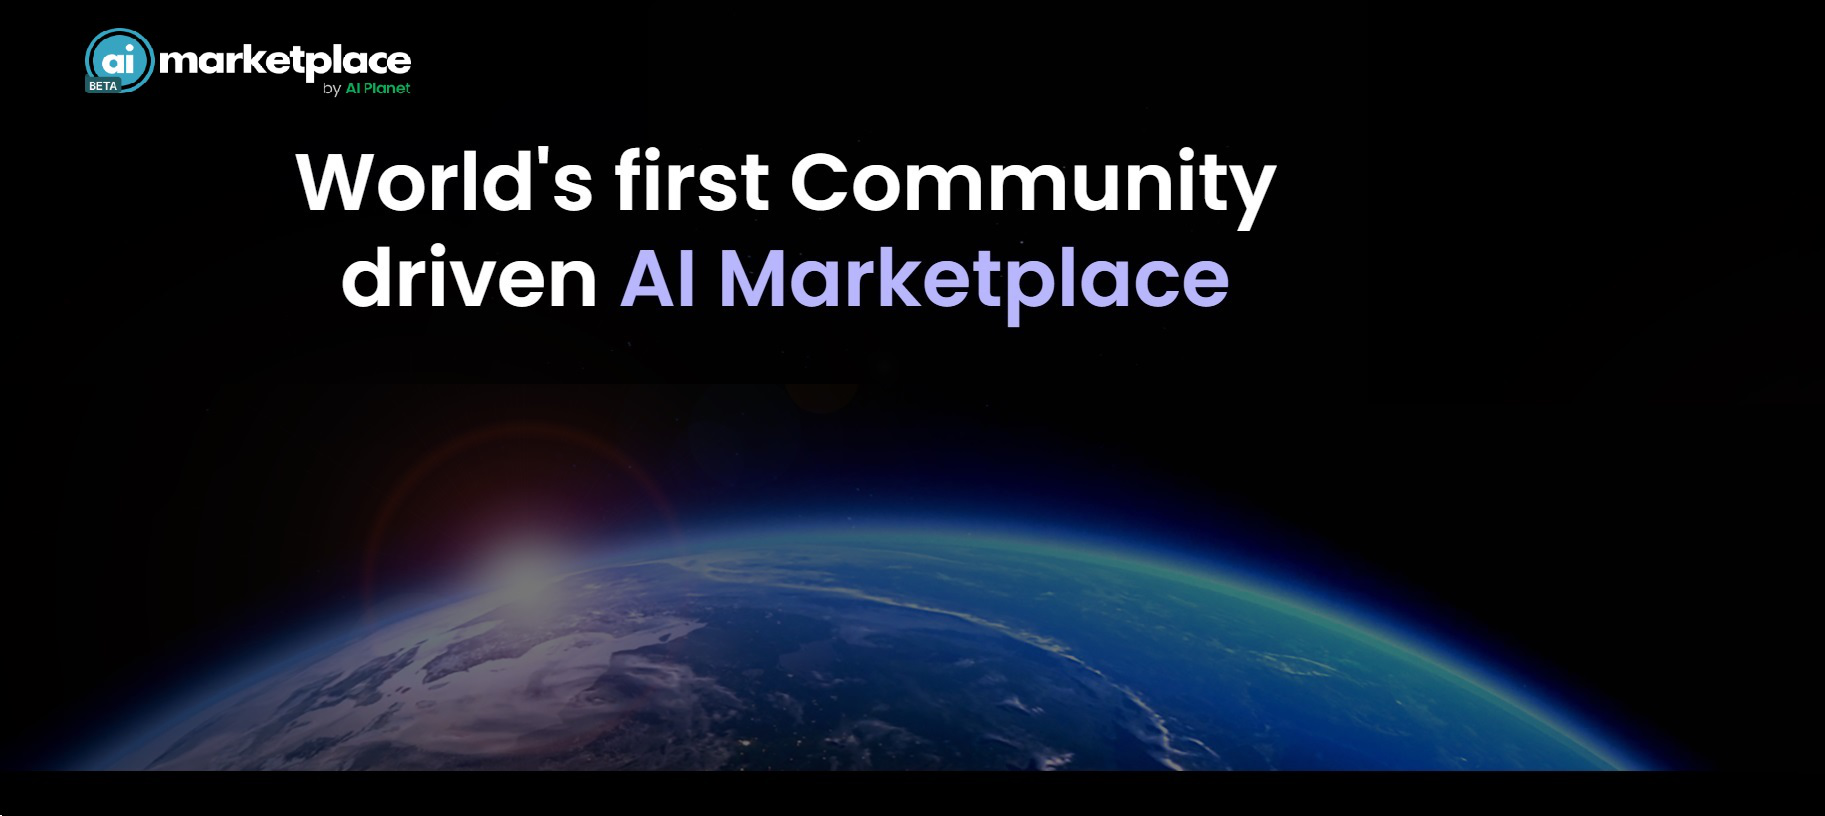

In [5]:
from IPython.display import display
from PIL import Image
img = Image.open("/content/ai.jpg")
display(img)

## Basic query functionalities

**Index, retriever, and query engine** are three basic components for asking questions over your data or documents:

* Index is a data structure that allows us to retrieve relevant information quickly for a user query from external documents. Index works by parsing documents into text chunks, which are called “Node” objects, and then building index from the chunks.
* Retriever is used for fetching and retrieving relevant information given user query.

* Query engine is built on top of index and retriever providing a generic interface to ask questions about your data.

In [9]:
from llama_hub.wikipedia.base import WikipediaReader

loader = WikipediaReader()
docs = loader.load_data(pages=['Jagganath'])

In [11]:
from llama_index import VectorStoreIndex
from getpass import getpass
import os
os.environ["OPENAI_API_KEY"] = getpass()

··········


In [13]:
!pip install -qU openai

In [14]:
import openai
openai.api_key = os.environ["OPENAI_API_KEY"]
index = VectorStoreIndex.from_documents(docs)
query_engine = index.as_query_engine()
response = query_engine.query("Who is Jagannath.")

In [15]:
print(response)


Jagannath is a deity worshipped in regional Hindu traditions in India and Bangladesh as part of a triad along with his brother Balabhadra, and sister, Subhadra. Jagannath is considered a non-sectarian deity and is significant regionally in the Indian states of Odisha, Chhattisgarh, West Bengal, Jharkhand, Bihar, Gujarat, Assam, Manipur and Tripura. He is also significant to the Hindus of Bangladesh. Jagannath is an abstract representation of Krishna, or Vishnu, sometimes as the avatar of Krishna or Vishnu. He is also sometimes seen as a symmetry-filled tantric form of Bhairava, a fierce manifestation of Shiva associated with annihilation. The idol of Jagannath is a carved and decorated wooden stump with large round eyes and a symmetric face, and the idol has a conspicuous absence of hands or legs. The worship procedures, sacraments and rituals associated with Jagannath are syncretic and include rites that are uncommon in Hinduism.


In [19]:
query_engine = index.as_query_engine()
response = query_engine.query("Where is the Jagannath Temple Located? Only specify the location.")
print(response)


Puri, India


In [27]:
query_engine = index.as_query_engine()
out = query_engine.query("What is the purpose of Bhoga Mandap?")
print(out.response)


The Bhoga Mandap is a chamber in the temple that is used for offerings. It is where offerings such as lamps, gold, silver, precious stones, and cows are made to the deities.


In [23]:
output = query_engine.query("Where is the offerings made to Lord Jagannath?")

In [24]:
type(output)

llama_index.response.schema.Response

In [26]:
output.response

'\nOfferings are made to Lord Jagannath at the Temple of Jagannath at Puri. On the way back from the Gundicha Temple, the three chariots stop at the Mausi Maa Temple and the deities are offered poda pitha, a kind of baked cake which are generally consumed by the poor sections only.'

## Handle document updates
Often times, once we create an index for our document, there might be a need to periodically update the document. This process can be costly if we were to recreate the embeddings for the entire document again.

LlamaIndex index structure offers a solution by enabling efficient insertion, deletion, update, and refresh operations.

For example, a new document can be inserted as additional nodes (text chunks) without the need to recreate nodes from previous documents:

In [35]:
# Source: https://gpt-index.readthedocs.io/en/latest/how_to/index/document_management.html
from llama_index import ListIndex, Document

index = ListIndex([])
text_chunks = ['Rath Yatra is one of the biggest festival in Odisha', 'Siuli Mahaveer is situated at Chandanpur 60 kms from Bhubaneswar', 'Ramachandi Temple is situated at the Marine Drive Road Konarak']

doc_chunks = []
for i, text in enumerate(text_chunks):
    doc = Document(text=text)
    doc_chunks.append(doc)

# insert
for doc_chunk in doc_chunks:
    index.insert(doc_chunk)

In [37]:
output = query_engine.query("Where is Siuli Mahaveer located?")
output.response

'\nSiuli Mahaveer is not mentioned in the context information.'